### **Exercise 2.11 (programming)**
Make a figure analogous to Figure 2.6 for the nonstationary
case outlined in Exercise 2.5. Include the constant-step-size $\epsilon$-greedy algorithm with
$\alpha = 0.1$. Use runs of 200,000 steps and, as a performance measure for each algorithm and
parameter setting, use the average reward over the last 100,000 steps.

### **Solution**

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from lib.agent import Agent
from lib.environment import Environment

In [2]:
class Testbed:
    
    def __init__(self, arms, stationary=False):
        self.arms = arms
        self.stationary = stationary
        self.reset()

    def get_reward(self, action):
        reward = np.random.normal(self.q_actuals[action], 1.)
        self.random_walk()
        return reward
    
    def random_walk(self):
        self.q_actuals += np.random.normal(0., 0.01, size=self.arms)
        self.q_optimal = np.amax(self.q_actuals)
        self.optimal_action = np.argmax(self.q_actuals)

    def reset(self):
        self.q_actuals = np.zeros(self.arms)
        self.q_optimal = np.amax(self.q_actuals)
        self.optimal_action = np.argmax(self.q_actuals)

In [3]:
arms = 10
pulls = int(1e5)
iterations = 200

testbed_ns  = Testbed(arms)
env = Environment(pulls, iterations, testbed_ns)

In [4]:
v = False  # Set verebose to print progress

strategies = ['epsilon_greedy', 'ucb', 'gradient']

configs = {
    'epsilon': [2. ** x for x in range(-7, -1)],
    'init_val': [2. ** x for x in range(-2, 3)],
    'c': [2. ** x for x in range(-4, 3)],
    'alpha': [2. ** x for x in range(-5, 2)]
}

reward_avgs = {k: [] for k in configs.keys()}

for s in strategies:
    if s == 'epsilon_greedy':
        for e in configs['epsilon']:
            agent = Agent(arms, strategy=s, epsilon=e, step_size=0.1)
            scores_avg, _ = env.run(agent, verbose=v)
            reward_avgs['epsilon'].append(np.mean(scores_avg))
        
        for i in configs['init_val']:
            agent = Agent(arms, strategy=s, init_val=i, epsilon=0., step_size=0.1)
            scores_avg, _ = env.run(agent, verbose=v)
            reward_avgs['init_val'].append(np.mean(scores_avg))
    
    elif s == 'ucb':
        for c in configs['c']:
            agent = Agent(arms, strategy=s, c=c, step_size=0.1)
            scores_avg, _ = env.run(agent, verbose=v)
            reward_avgs['c'].append(np.mean(scores_avg))
    
    elif s == 'gradient':
        for a in configs['alpha']:
            agent = Agent(arms, strategy=s, step_size=a)
            scores_avg, _ = env.run(agent, verbose=v)
            reward_avgs['alpha'].append(np.mean(scores_avg))

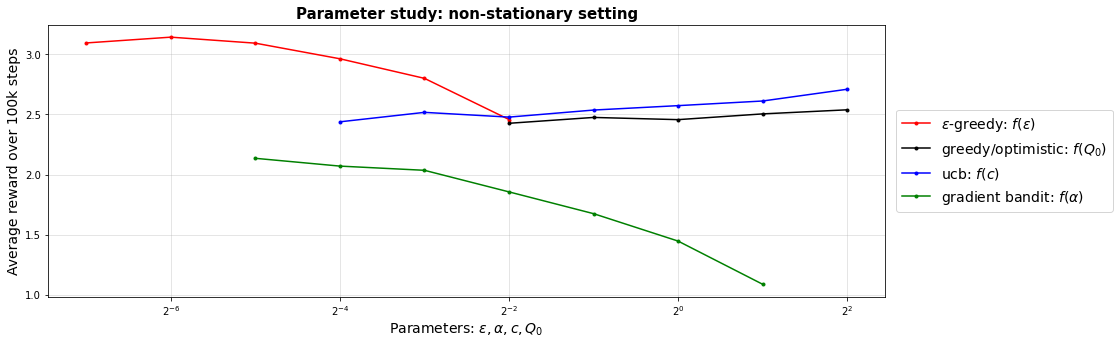

In [5]:
# For plotting figures inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 5.)
plt.rcParams['axes.titlesize'] = 15.
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14.
plt.rcParams['legend.fontsize'] = 14.
plt.rcParams['legend.loc'] = 'center right'

# Plot rewards averaged over runs vs time-steps/pulls
colors = ['r', 'k', 'b', 'g']
for h, c in zip(configs.keys(), colors):
    plt.plot(configs[h], reward_avgs[h], color=c, marker='.')
plt.xscale('log', base=2)
plt.title('Parameter study: non-stationary setting')
plt.xlabel(r'Parameters: $\epsilon, \alpha, c, Q_0$')
plt.ylabel('Average reward over 100k steps')
plt.legend(
    [
     r'$\epsilon$-greedy: $f(\epsilon)$',
     r'greedy/optimistic: $f(Q_0)$',
     r'ucb: $f(c)$',
     r'gradient bandit: $f(\alpha)$'
    ],
    bbox_to_anchor=(1.28, 0.5)
)
plt.grid(alpha=0.4)
plt.show()